# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train.shape

(404, 13)

# 4. Simple Linear Model

In [6]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(x_train, y_train)
modellr.score(x_train, y_train)

0.7404261215756407

In [7]:
#modellr.fit(x_test, y_test)
modellr.score(x_test, y_test)

0.7102045510983968

In [8]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.fit_transform(x_test)

In [9]:
modellp = LinearRegression()
modellp.fit(x_train_poly, y_train)
modellp.score(x_train_poly, y_train)


0.936110852524442

In [ ]:
modellp.score(x_test_poly, y_test)

0.799066786409218

# 5. Ridge Regularization for Linear Model

In [10]:
from sklearn.linear_model import Ridge,Lasso
modelr = Ridge(alpha = 1000)
modelr.fit(x_train_poly, y_train)
modelr.score(x_train_poly, y_train)

0.900610362437451

In [11]:
modelr.score(x_test_poly, y_test)

0.8172860263672501

# 6. Lasso Regularization for Linear Model

In [12]:
models = Lasso(alpha = 10)
models.fit(x_train_poly, y_train)
models.score(x_train_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.949e+03, tolerance: 3.575e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8556525673984614

In [13]:
models.score(x_test_poly, y_test)

0.8131012796612669

# 7. Polynomial Regression of degree 2

In [14]:
 from sklearn.preprocessing import PolynomialFeatures
modelpf = PolynomialFeatures(degree = 2)
x_train_poly = modelpf.fit_transform(x_train)
x_train_poly

array([[1.00000000e+00, 2.18700000e-02, 6.00000000e+01, ...,
        1.54739957e+05, 1.97865110e+03, 2.53009000e+01],
       [1.00000000e+00, 5.20580000e-01, 0.00000000e+00, ...,
        1.50893402e+05, 3.70581300e+03, 9.10116000e+01],
       [1.00000000e+00, 2.37934000e+00, 0.00000000e+00, ...,
        2.98978681e+04, 4.80689800e+03, 7.72840000e+02],
       ...,
       [1.00000000e+00, 8.79212000e+00, 0.00000000e+00, ...,
        1.33225000e+01, 6.26340000e+01, 2.94465600e+02],
       [1.00000000e+00, 4.75237000e+00, 0.00000000e+00, ...,
        2.59284640e+03, 9.23179600e+02, 3.28696900e+02],
       [1.00000000e+00, 1.25790000e-01, 4.50000000e+01, ...,
        1.46566466e+05, 1.74575040e+03, 2.07936000e+01]])

In [15]:
x_test_poly = modelpf.fit_transform(x_test)
x_test_poly

array([[1.00000000e+00, 1.00840000e-01, 0.00000000e+00, ...,
        1.56491448e+05, 4.01919440e+03, 1.03225600e+02],
       [1.00000000e+00, 5.66637000e+00, 0.00000000e+00, ...,
        1.56570576e+05, 6.56449710e+03, 2.75228100e+02],
       [1.00000000e+00, 4.46200000e-02, 2.50000000e+01, ...,
        1.56523097e+05, 2.85644860e+03, 5.21284000e+01],
       ...,
       [1.00000000e+00, 9.51200000e-02, 0.00000000e+00, ...,
        1.46865233e+05, 3.42607620e+03, 7.99236000e+01],
       [1.00000000e+00, 1.27570000e-01, 3.00000000e+01, ...,
        1.40407584e+05, 1.94474490e+03, 2.69361000e+01],
       [1.00000000e+00, 1.80846000e+01, 0.00000000e+00, ...,
        7.42562500e+02, 7.91612500e+02, 8.43902500e+02]])

In [16]:
modellrpf = LinearRegression()
modellrpf.fit(x_train_poly, y_train)
modellrpf.score(x_train_poly, y_train)

0.936110852524442

In [17]:
 modellrpf.score(x_test_poly, y_test)

0.7951486031932933

# 8. Ridge Regularization for Polynomial model

In [19]:
 from sklearn.linear_model import Ridge, Lasso
modelrpf = Ridge(alpha = 0)
modelrpf.fit(x_train_poly, y_train)
modelrpf.score(x_train_poly, y_train) 

0.9363739809505554

In [20]:
 modelrpf.score(x_test_poly, y_test) 

0.7996723905551479

# 9. Lasso Regularization for Polynomial model

In [22]:
 modellpf = Lasso(alpha = 0)
modellpf.fit(x_train_poly, y_train)
modellpf.score(x_train_poly, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.352e+03, tolerance: 3.575e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

0.9243320518441293

In [25]:
 modellpf.score(x_test_poly, y_test)

0.7223524514934935

# 10. Select K Best

In [ ]:
X.shape

(506, 13)

In [ ]:
#implementing feature selection using SelectKBest Class
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

kb = SelectKBest(score_func=f_regression,k=10)
x_selected = kb.fit_transform(X,y)
x_selected.shape


(506, 10)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_selected, y, random_state = 10)
xtrain.shape

(379, 10)

In [ ]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr.score(xtrain, ytrain)

0.7099278711624815

In [ ]:
lr.score(xtest, ytest)

0.648901984012233

In [ ]:
df = pd.DataFrame(data=X, columns=boston.feature_names)
df['y'] = y #for target value (correlation between target value and features)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT     y  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [ ]:
corr = df.corr() #Defaut method = pearson's 
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
y       -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT         y  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
y        0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

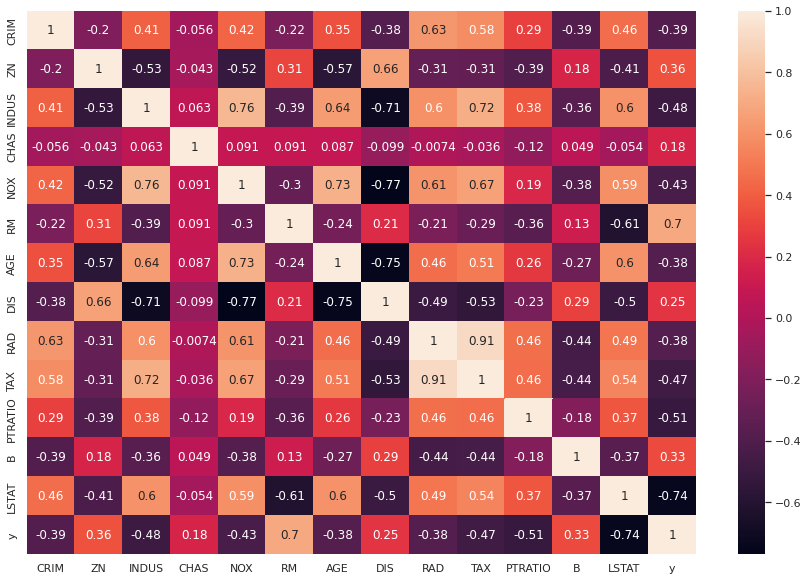

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr, annot=True)
plt.show()

In [ ]:
#Manual feature selection. Drop a feature if there is correlation among the features itself
columns = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM'] 

In [ ]:
sdf = df[columns]
sdf.head()

RM  LSTAT  PTRATIO  INDUS    TAX    NOX     CRIM
0  6.575   4.98     15.3   2.31  296.0  0.538  0.00632
1  6.421   9.14     17.8   7.07  242.0  0.469  0.02731
2  7.185   4.03     17.8   7.07  242.0  0.469  0.02729
3  6.998   2.94     18.7   2.18  222.0  0.458  0.03237
4  7.147   5.33     18.7   2.18  222.0  0.458  0.06905

Conclusion: Even with feature selection accuracy is not improving

# 11. Conclusion

In [26]:
#Regulariization omproves the accuracy of the model. It also helps to improve overfitting and underfitting of the model
#Select K Best improves the accuracy of the model by reducing the number of features by selecting only the best features.
#It visualizes how the training data are related to each other and minizes overfittinh and underfittinh  of the model. 